In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [2]:
carseats=pd.read_csv('carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Add a column called 'Class' that is 1 if Sales > 8 and 0 otherwise.

In [3]:
def add_class(row):
    if row['Sales']> 8:
        return 1
    else:
        return 0
carseats['Class']=carseats.apply(add_class,axis=1)

Next, let's one-hot encode the categorical variables.

In [4]:
df=pd.get_dummies(carseats)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Class,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,1,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,1,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,0,1,0,0,0,1,1,0


Split the data into training and test sets. Also, drop 'Sales' since that is telling us the Class label exactly. 

In [5]:
X=df.drop(['Sales','Class'],axis=1)
y=df['Class']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=5)

In [7]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression

Run logistic Regression... 

In [9]:
lm = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [10]:
accuracy_score(lm.predict(X_test_scaled),y_test)

0.85

In [11]:
pd.crosstab(lm.predict(X_test_scaled),y_test)

Class,0,1
row_0,,
0,62,17
1,1,40


Now try k means:

In [12]:
cvres=[]
for i in range(1,40):
    clf = KNeighborsClassifier(n_neighbors=i)
    nn = cross_validate(clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cvres.append(nn['test_score'].mean())

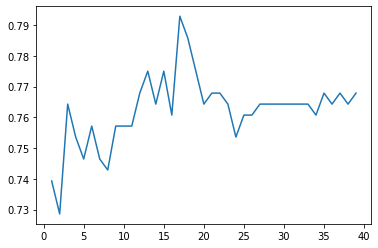

In [13]:
plt.plot(list(range(1,40)),cvres)

In [14]:
np.argmax(cvres)

16

So $n=17$ is the max. Refit on training data...

In [15]:
clf=KNeighborsClassifier(n_neighbors=17).fit(X_train_scaled,y_train)

In [16]:
accuracy_score(clf.predict(X_test_scaled),y_test)

0.675

In [17]:
pd.crosstab(clf.predict(X_test_scaled),y_test)

Class,0,1
row_0,,
0,60,36
1,3,21


Logistic Regression wins this one -- does much better on class 1 in particular.